In [82]:
from hmac import digest_size

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL.ImageTransform import ExtentTransform
from jsonschema.exceptions import best_match
from nbformat.v1 import upgrade
from pandas import value_counts
from pygments.styles.dracula import background

In [83]:
sns.set_style("whitegrid")

In [84]:
df = pd.read_csv("C:\\Users\\SAURABH\\Downloads\\german_credit_data.csv")

In [85]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [86]:
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [87]:
df.shape

(1000, 11)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [89]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df['Job'].unique()

array([2, 1, 3, 0])

In [91]:
plt.style.use('default')

In [92]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
df.dropna().reset_index(drop=True)
df.shape

(1000, 11)

In [95]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

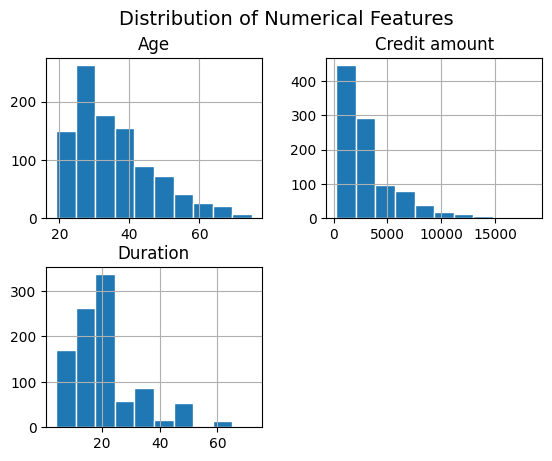

In [96]:
df[['Age', 'Credit amount', 'Duration']].hist(bins = 10, edgecolor = 'white')
plt.suptitle('Distribution of Numerical Features', fontsize = 14)
plt.show()

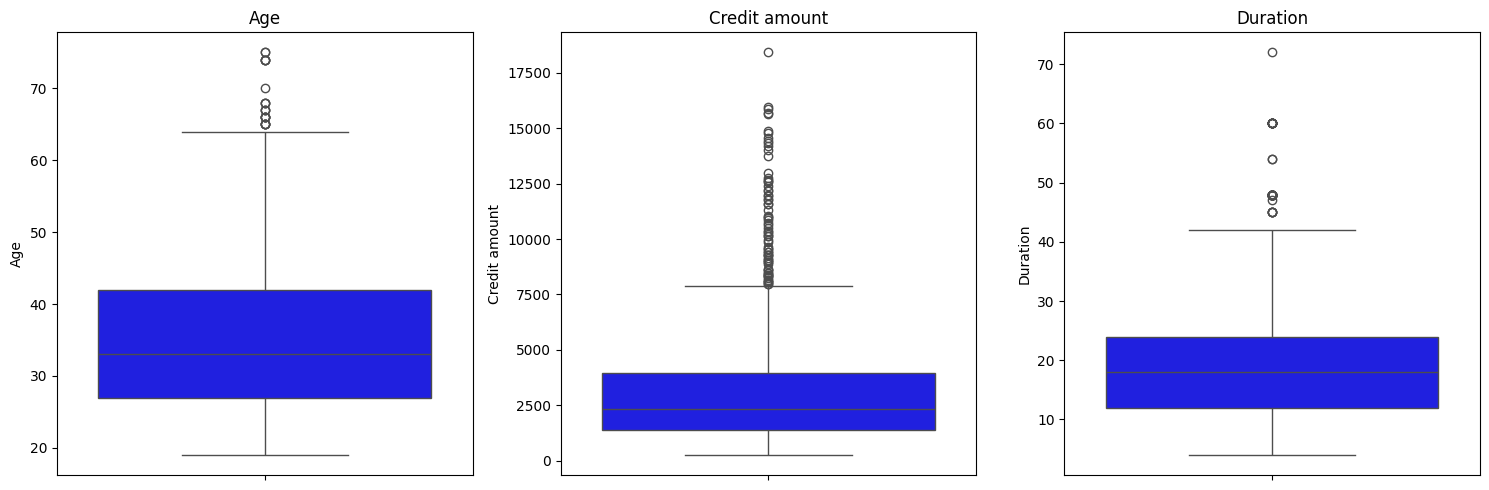

In [97]:
plt.figure(figsize=(15,5))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot( y = df[col], color= 'blue', showfliers=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [98]:
df.query('Duration >= 40')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
11,11,24,female,2,rent,little,little,4308,48,business,bad
29,29,63,male,2,own,little,little,6836,60,business,bad
35,35,25,male,1,own,little,moderate,4746,45,radio/TV,bad
...,...,...,...,...,...,...,...,...,...,...,...
973,973,36,male,2,rent,little,little,7297,60,business,bad
981,981,33,male,3,rent,little,NaN,4844,48,business,bad
986,986,33,male,2,own,little,rich,6289,42,business,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [99]:
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Purpose' ]


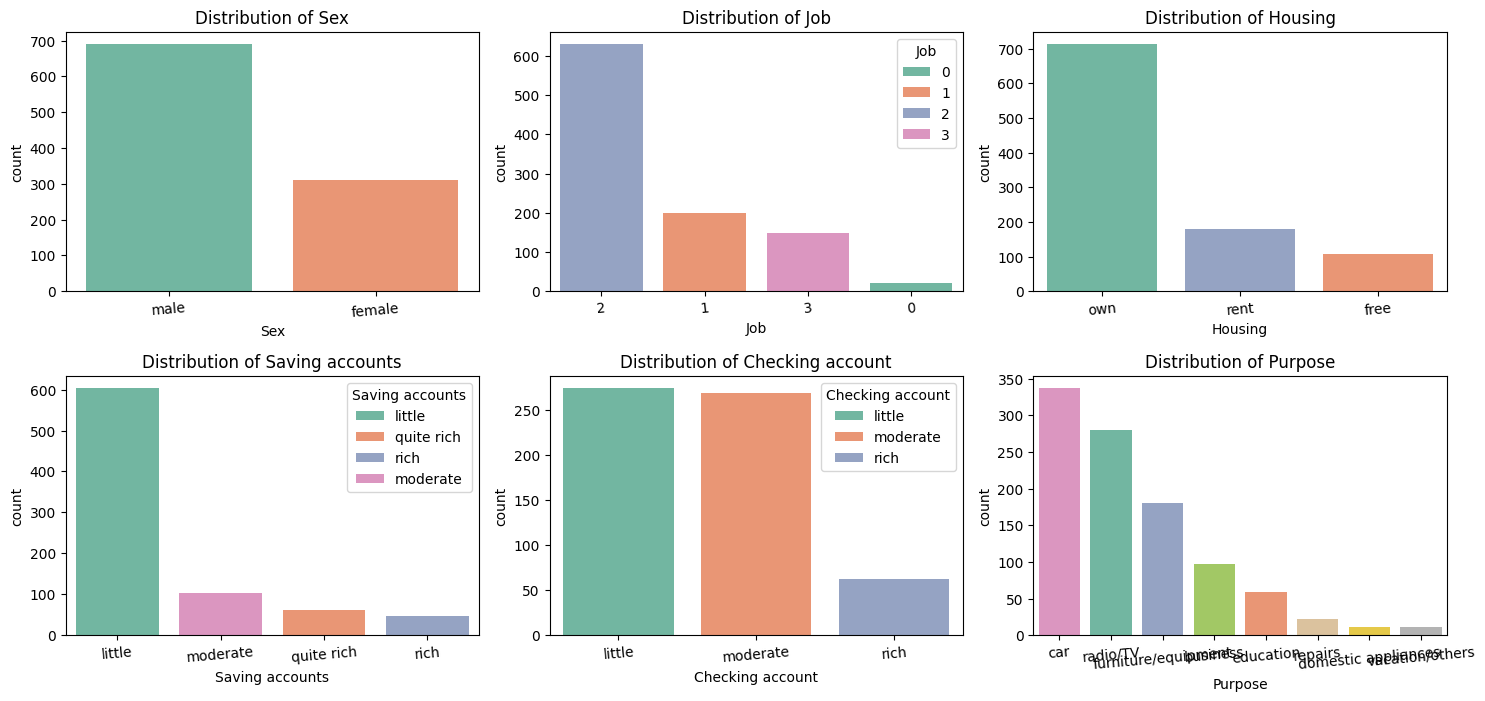

In [100]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(
        data=df,
        x=col,
        hue = col,
        palette="Set2",
        order=df[col].value_counts().index
    )
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=5)

plt.tight_layout()
plt.show()

In [101]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [102]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].corr()

In [103]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


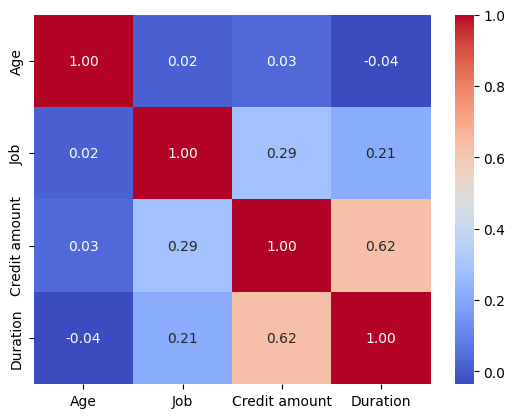

In [104]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [105]:
df.groupby('Job')['Credit amount'].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [106]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [107]:
df.groupby('Age')['Duration'].mean()

Age
19    10.500000
20    16.000000
21    26.142857
22    17.074074
23    18.500000
24    24.840909
25    21.487805
26    20.940000
27    22.235294
28    20.093023
29    20.135135
30    23.900000
31    23.421053
32    21.411765
33    19.666667
34    23.562500
35    18.650000
36    21.512821
37    21.413793
38    21.791667
39    20.142857
40    20.000000
41    20.647059
42    24.409091
43    19.647059
44    17.705882
45    20.333333
46    21.611111
47    21.470588
48    19.916667
49    15.071429
50    23.250000
51    15.500000
52    11.444444
53    24.857143
54    22.500000
55    19.500000
56    20.000000
57    21.888889
58    33.600000
59    24.000000
60    27.333333
61    18.000000
62    15.000000
63    29.375000
64    12.400000
65    22.200000
66    15.000000
67    11.000000
68    13.333333
70    10.000000
74    11.000000
75    15.000000
Name: Duration, dtype: float64

In [108]:
df.groupby('Duration')['Credit amount'].mean()

Duration
4      1662.833333
5      3448.000000
6      1787.733333
7      1779.200000
8      1373.000000
9      1714.714286
10     1888.964286
11     3047.888889
12     1787.446927
13     1547.250000
14     3790.750000
15     2216.171875
16     1900.000000
18     2718.336283
20     4313.250000
21     3073.533333
22     1979.000000
24     3243.554348
26     7966.000000
27     4647.153846
28     4857.666667
30     4494.400000
33     4766.000000
36     5748.180723
39     8405.800000
40     5998.000000
42     5846.818182
45     5202.800000
47    10722.000000
48     7405.604167
54    12690.500000
60     9973.769231
72     5595.000000
Name: Credit amount, dtype: float64

In [109]:
pd.pivot_table(data=df, values='Credit amount', index='Housing', columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


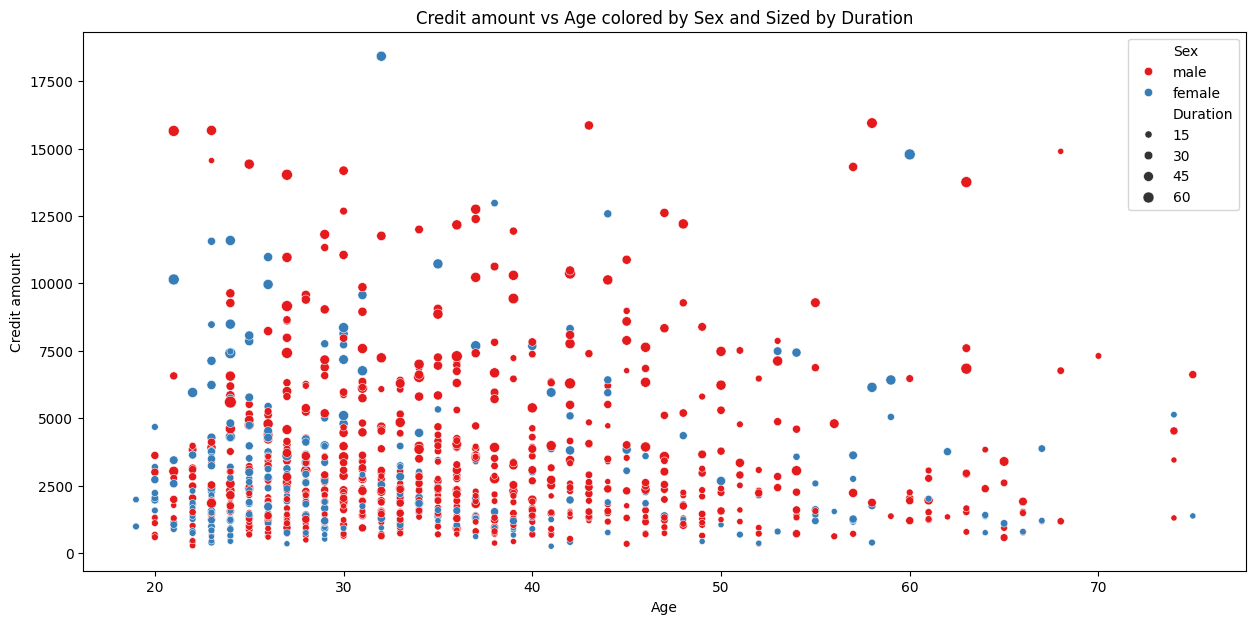

<Figure size 640x480 with 0 Axes>

In [110]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Sex',size='Duration',alpha=1, palette='Set1')
plt.title('Credit amount vs Age colored by Sex and Sized by Duration')
plt.show()
plt.tight_layout()

C:\Users\SAURABH\AppData\Local\Temp\ipykernel_20044\3627455310.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Saving accounts', y='Credit amount', palette='Pastel1')


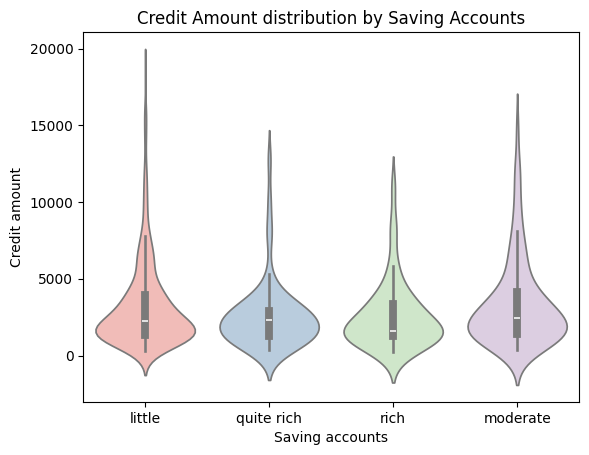

<Figure size 640x480 with 0 Axes>

In [111]:
sns.violinplot(df, x='Saving accounts', y='Credit amount', palette='Pastel1')
plt.title('Credit Amount distribution by Saving Accounts')
plt.show()
plt.tight_layout()

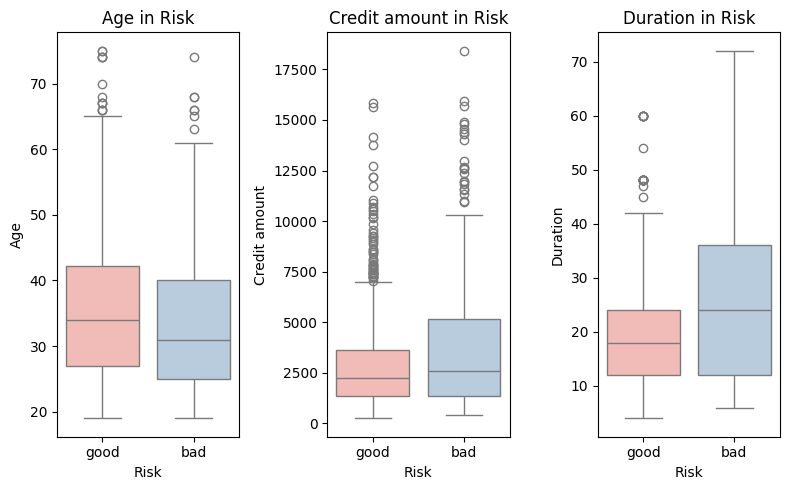

In [112]:
plt.figure(figsize=(8,5))
for i,col in enumerate (['Age', 'Credit amount', 'Duration']):
      plt.subplot(1,3,i+1)
      sns.boxplot(data=df, x='Risk', y=col, hue='Risk', palette='Pastel1')
      plt.title(f'{col} in Risk')
plt.tight_layout()
plt.show()

In [113]:
df.groupby('Risk')[['Age','Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [114]:
cat_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

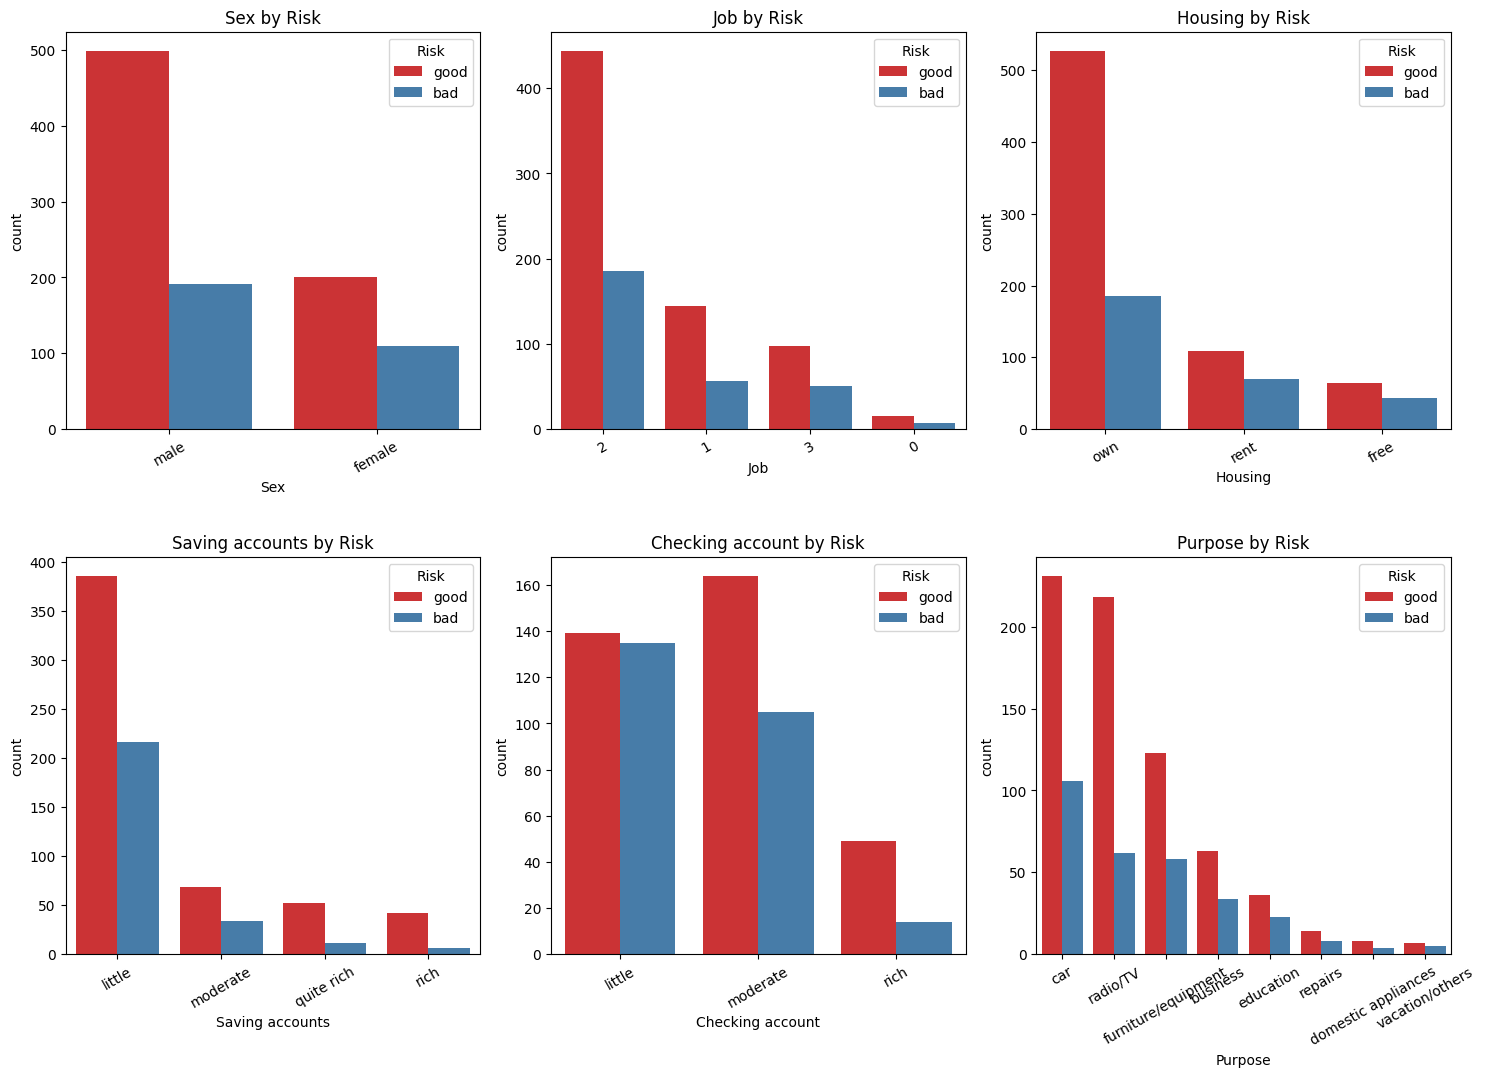

In [115]:
plt.figure(figsize= (15,15))
for i, col in enumerate (cat_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data= df, x = col, hue = "Risk", palette = "Set1", order = df[col].value_counts().index)
    plt.title(f'{col} by Risk')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

## FEATURE ENGGINERING

In [116]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [117]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [118]:
target = "Risk"

In [119]:
df_model = df[features + [target]].copy()

In [120]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,NaN,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,NaN,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [121]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
from sklearn.preprocessing import (LabelEncoder)
import joblib

In [123]:
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")

In [124]:
le_dict = {}

In [125]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [126]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [127]:
le_target = LabelEncoder()

In [128]:
df_model[target] = le_target.fit_transform(df_model[target])

In [129]:
df_model[target]

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [130]:
df_model[target].value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [131]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,4,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,3,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x = df_model.drop(target, axis=1)

In [134]:
y = df_model[target]

In [135]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,4,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,3,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,3,804,12
998,23,1,2,0,0,0,1845,45


In [136]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify= y,random_state = 1 )

In [138]:
x_train.shape

(800, 8)

In [139]:
x_test.shape

(200, 8)

## Modeling

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [141]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [142]:
from xgboost import XGBClassifier

In [145]:
def train_model(model, param_grid, x_train, y_train, x_test, y_test):
    grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [147]:
dt = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid = {
    "max_depth" : [3,5,7,None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [148]:
best_dt, acc_dt, param_dt = train_model(dt, dt_param_grid, x_train, y_train, x_test, y_test)

In [149]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.705


In [150]:
print("Best parameters", param_dt)

Best parameters {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [154]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)

In [159]:
rf_param_grid = {
    "n_estimators" : [100,200],
    "max_depth" : [5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [160]:
best_rf, acc_rf, param_rf = train_model(rf, rf_param_grid, x_train, y_train, x_test, y_test)

In [162]:
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.78


In [163]:
print("Best Parameters", param_rf)

Best Parameters {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [164]:
et = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1)

In [165]:
et_param_grid = {
    "n_estimators" : [100,200],
    "max_depth" : [5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [166]:
best_et, acc_et, param_et = train_model(et, et_param_grid, x_train, y_train, x_test, y_test)

In [167]:
print("Extra Tree Accuracy", acc_et)

Extra Tree Accuracy 0.755


In [168]:
print("Best param:", param_et)

Best param: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [171]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    use_label_encoder=False,
    eval_metric="logloss"
)

In [172]:
xgb_param_grid = {
    "n_estimator" :[100,200],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.01, 0.1, 0.2],
    "subsample" : [0.7, 1],
    "colsample_bytree" : [0.7, 1]
}

In [177]:
best_xgb, acc_xgb, param_xgb = train_model(xgb, xgb_param_grid, x_train, y_train, x_test, y_test)

C:\Users\SAURABH\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:35:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "n_estimator", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [178]:
print("XGB Accuracy", acc_xgb)

XGB Accuracy 0.74


In [179]:
print("Best Parameters", param_xgb)

Best Parameters {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimator': 100, 'subsample': 0.7}


## Best Model

In [180]:
best_et.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0])

In [181]:
joblib.dump(best_et, "extra_tree_credit_model.pkl")

['extra_tree_credit_model.pkl']

In [182]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')